
Graph Information:
Number of nodes: 6
Number of edges: 6

Nodes and their heuristics:
Node 1: h = 5
Node 2: h = 4
Node 3: h = 23
Node 4: h = 2
Node 5: h = 3
Node 6: h = 0

Edges and their weights:
Edge 1 - 2: weight = 3
Edge 1 - 3: weight = 1
Edge 2 - 4: weight = 4
Edge 3 - 4: weight = 3
Edge 4 - 5: weight = 1
Edge 5 - 6: weight = 20

Adjacency Matrix:
[[ 0.  3.  1.  0.  0.  0.]
 [ 3.  0.  0.  4.  0.  0.]
 [ 1.  0.  0.  3.  0.  0.]
 [ 0.  4.  3.  0.  1.  0.]
 [ 0.  0.  0.  1.  0. 20.]
 [ 0.  0.  0.  0. 20.  0.]]


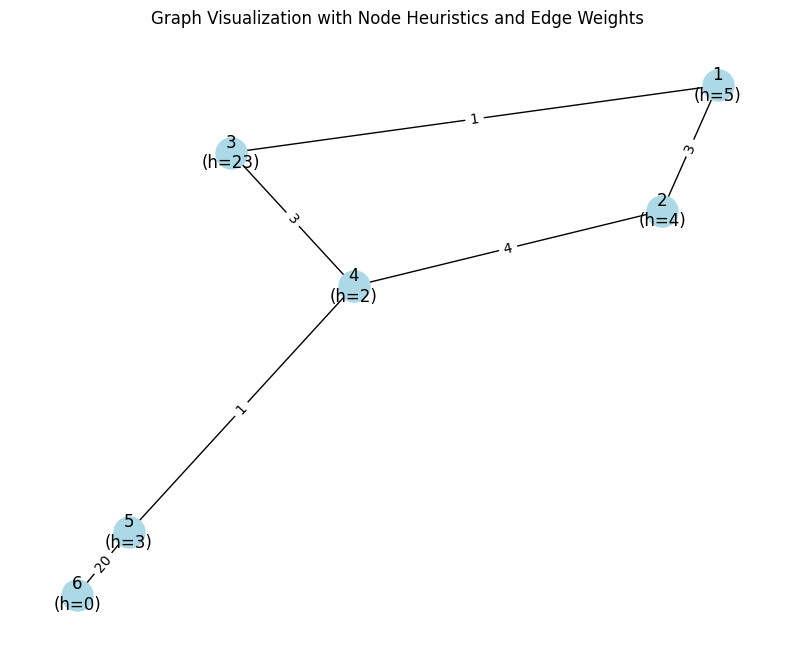

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create graph and add nodes/edges (from your existing code)
G = nx.Graph()
heuristics = {1: 5, 2: 4, 3: 23, 4: 2, 5: 3, 6: 0}
G.add_nodes_from(heuristics.keys())

edges = [(1, 2, 3), (1, 3, 1), (2, 4, 4), (3, 4, 3), (4, 5, 1), (5, 6, 20)]
G.add_weighted_edges_from(edges)

# Create a visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Position nodes using spring layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                      node_size=500)

# Draw edges with weights
nx.draw_networkx_edges(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Draw node labels with heuristic values
node_labels = {node: f"{node}\n(h={heuristics[node]})" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, node_labels)

plt.title("Graph Visualization with Node Heuristics and Edge Weights")
plt.axis('off')

# Print graph information
print("\nGraph Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nNodes and their heuristics:")
for node in sorted(G.nodes()):
    print(f"Node {node}: h = {heuristics[node]}")

print("\nEdges and their weights:")
for edge in G.edges(data=True):
    print(f"Edge {edge[0]} - {edge[1]}: weight = {edge[2]['weight']}")

# Show adjacency matrix (from your existing code)
adj_matrix = nx.to_numpy_array(G, nodelist=sorted(G.nodes))
print("\nAdjacency Matrix:")
print(adj_matrix)

plt.show()


In [2]:

# A* Algorithm Implementation
def a_star(graph, start, goal, h):
    open_set = {start}
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = h[start]

    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        open_set.remove(current)
        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + h[neighbor]
                if neighbor not in open_set:
                    open_set.add(neighbor)
    
    return None  # No path found

# Finding the shortest path from node 1 to node 6
path = a_star(G, 1, 6, heuristics)
print("Shortest Path using A*:", path)


Shortest Path using A*: [1, 3, 4, 5, 6]


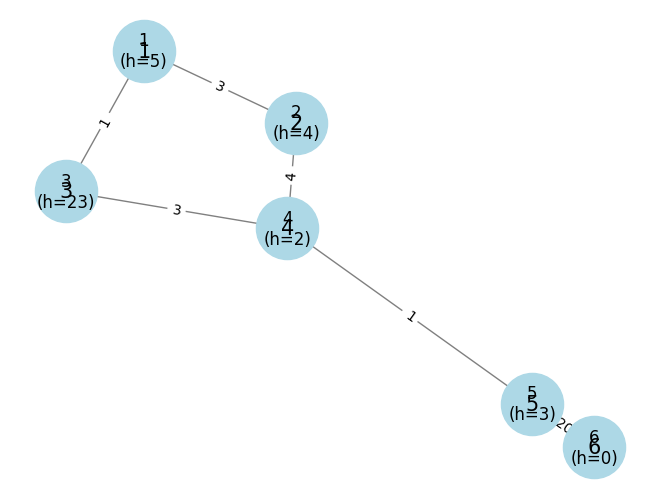

In [3]:

# Graph Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels={node: f"{node}\n(h={heuristics[node]})" for node in G.nodes})
plt.show()
